**Connect google drive**

In [0]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sat Jun 13 18:04:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
'Ahmad Beltagy (1).pdf'
'Ahmad Beltagy.pdf'
'[Beltagy] [4195] Polynomials'
'BERT sequence classifier.ipynb'
 character_embedding.ipynb
'Colab Notebooks'
'Computer vision'
'Computer vision Cheat sheet.gdoc'
'Computer Vision Data'
'Computer Vision Project 5'
'Computer Vision Project Milestones.gdoc'
 dev_labeled.csv
 Fine_tuning_using_script.ipynb
'Graduation Project'
 __MACOSX
 NADI-2020_DEV_2.0.zip
 NADI-2020_TEST_2.0
'NADI progress report.gdoc'
 NADI_release

**1) Clone the Darknet**



In [0]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 13666 (delta 1), reused 1 (delta 0), pack-reused 13658
Receiving objects: 100% (13666/13666), 12.26 MiB | 12.92 MiB/s, done.
Resolving deltas: 100% (9316/9316), done.


In [0]:
%cd darknet
!wget https://pjreddie.com/media/files/yolov3.weights
%cd ..

[Errno 20] Not a directory: 'darknet'
/content/darknet
--2020-06-13 18:16:15--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   492KB/s    in 7m 22s  

2020-06-13 18:23:38 (548 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]

/content


**2) Compile Darknet using Nvidia GPU**


In [0]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variabl

**3) Configure Darknet network for training YOLO V3**

In [0]:
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [0]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg

In [0]:
# Create folder on google drive so that we can save there the weights
!mkdir "/mydrive/yolov3"

mkdir: cannot create directory ‘/mydrive/yolov3’: File exists


In [0]:
!echo "car" > data/obj.names
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3' > data/obj.data
!mkdir data/obj

In [0]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-06-13 18:08:01--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   609KB/s    in 4m 48s  

2020-06-13 18:12:51 (550 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



**4) Extract Images**

The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

In [0]:
!unzip /mydrive/yolov3/images.zip -d data/obj

Archive:  /mydrive/yolov3/images.zip
  inflating: data/obj/cars_026.txt   
  inflating: data/obj/cars_027.jpeg  
  inflating: data/obj/cars_027.txt   
  inflating: data/obj/cars_028.jpeg  
  inflating: data/obj/cars_028.txt   
  inflating: data/obj/cars_029.jpeg  
  inflating: data/obj/cars_029.txt   
  inflating: data/obj/cars_030.jpeg  
  inflating: data/obj/cars_030.txt   
  inflating: data/obj/cars_031.jpeg  
  inflating: data/obj/cars_031.txt   
  inflating: data/obj/cars_032.jpeg  
  inflating: data/obj/cars_032.txt   
  inflating: data/obj/cars_033.jpeg  
  inflating: data/obj/cars_033.txt   
  inflating: data/obj/cars_034.jpeg  
  inflating: data/obj/cars_034.txt   
  inflating: data/obj/cars_035.jpeg  
  inflating: data/obj/cars_035.txt   
  inflating: data/obj/cars_036.jpeg  
  inflating: data/obj/cars_036.txt   
  inflating: data/obj/cars_037.jpeg  
  inflating: data/obj/cars_037.txt   
  inflating: data/obj/cars_038.jpeg  
  inflating: data/obj/cars_038.txt   
  inflating: 

In [0]:
# We're going to convert the class index on the .txt files. As we're working with only one class, it's supposed to be class 0.
# If the index is different from 0 then we're going to change it.
import glob
import os
import re

txt_file_paths = glob.glob(r"data/obj/*.txt")
for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()

        text_converted = []
        for line in lines:
            print(line)
            numbers = re.findall("[0-9.]+", line)
            print(numbers)
            if numbers:

                # Define coordinates
                text = "{} {} {} {} {}".format(0, numbers[1], numbers[2], numbers[3], numbers[4])
                text_converted.append(text)
                print(i, file_path)
                print(text)
        # Write file
        with open(file_path, 'w') as fp:
            for item in text_converted:
                fp.writelines("%s\n" % item)

4 0.461333 0.640667 0.136889 0.149333

['4', '0.461333', '0.640667', '0.136889', '0.149333']
0 data/obj/cars_006.txt
0 0.461333 0.640667 0.136889 0.149333
4 0.620000 0.640000 0.107556 0.142667

['4', '0.620000', '0.640000', '0.107556', '0.142667']
0 data/obj/cars_006.txt
0 0.620000 0.640000 0.107556 0.142667
4 0.485333 0.377333 0.108444 0.149333

['4', '0.485333', '0.377333', '0.108444', '0.149333']
0 data/obj/cars_006.txt
0 0.485333 0.377333 0.108444 0.149333
4 0.604889 0.380667 0.100444 0.132000

['4', '0.604889', '0.380667', '0.100444', '0.132000']
0 data/obj/cars_006.txt
0 0.604889 0.380667 0.100444 0.132000
4 0.713333 0.263000 0.091556 0.123333

['4', '0.713333', '0.263000', '0.091556', '0.123333']
0 data/obj/cars_006.txt
0 0.713333 0.263000 0.091556 0.123333
4 0.824000 0.385000 0.103111 0.126000

['4', '0.824000', '0.385000', '0.103111', '0.126000']
0 data/obj/cars_006.txt
0 0.824000 0.385000 0.103111 0.126000
4 0.845778 0.643000 0.107556 0.130000

['4', '0.845778', '0.643000', '

In [0]:
import glob
images_list = glob.glob("data/obj/*.jpg")
print(images_list)

['data/obj/cars_001.jpg', 'data/obj/cars_011.jpg', 'data/obj/cars_012.jpg', 'data/obj/cars_007.jpg', 'data/obj/cars_009.jpg', 'data/obj/cars_002.jpg', 'data/obj/cars_010.jpg', 'data/obj/cars_003.jpg', 'data/obj/cars_008.jpg', 'data/obj/cars_004.jpg', 'data/obj/cars_014.jpg', 'data/obj/cars_013.jpg', 'data/obj/cars_006.jpg', 'data/obj/cars_005.jpg']


In [0]:
#Create training.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

**6) Start the training**

In [0]:
# Start the training
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show

v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.775730, GIOU: 0.770864), Class: 0.999151, Obj: 0.819895, No Obj: 0.003112, .5R: 0.888889, .75R: 0.777778, count: 9, class_loss = 0.242116, iou_loss = 0.399105, total_loss = 0.641221 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.822575, GIOU: 0.818270), Class: 0.997617, Obj: 0.947247, No Obj: 0.002883, .5R: 1.000000, .75R: 0.720000, count: 25, class_loss = 0.074122, iou_loss = 0.644588, total_loss = 0.718710 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.379573, GIOU: 0.379572), Class: 0.998276, Obj: 0.234551, No Obj: 0.000011, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.147111, iou_loss = 0.278470, total_loss = 0.425581 
 total_bbox = 428070, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.742389, GIOU: 0.728349), Class: 0.995919, Obj: 0.866237, No Obj: 0.003049, .5R: 1.000000, .75R: 0.500000, count: 8

# detection

In [0]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_training.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_training.cfg
%cd ..


/content/darknet/cfg
/content/darknet


In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

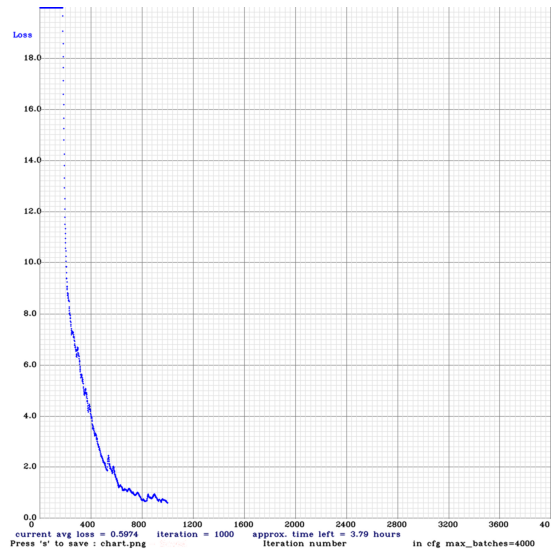

In [30]:
imShow('chart.png')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

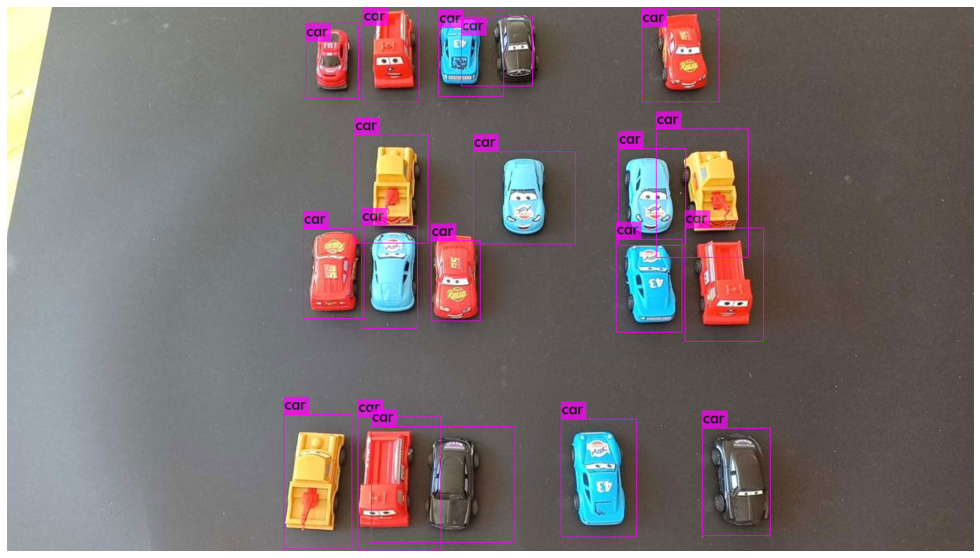

In [34]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_training_last.weights /mydrive/yolov3/car3.jpeg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

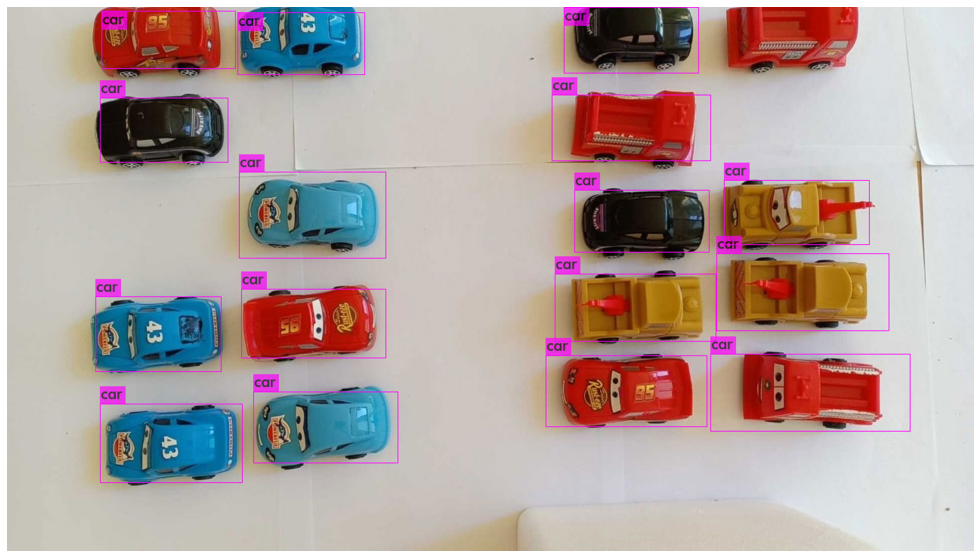

In [35]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_training_last.weights /mydrive/yolov3/car2.jpeg -thresh 0.3
imShow('predictions.jpg')